# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **6 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [4]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [5]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [6]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



### Caso 2

#### Codificación Ordinal

In [8]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [9]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [10]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

In [11]:
df_ohe_caso3 = pd.get_dummies(df)
scaler_caso3 = RobustScaler()
df_scl_ohe_caso3 = scaler_caso3.fit_transform(df_ohe_caso3)
df_scl_ohe_caso3 = pd.DataFrame(df_scl_ohe_caso3, columns = df_ohe_caso3.columns)
df_scl_ohe_caso3.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [12]:
X_caso3 = df_scl_ohe_caso3.drop(['price'], axis=1)
y_caso3 = df_scl_ohe_caso3['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_caso3, y_caso3, test_size=0.2, random_state=22)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_3 = LinearRegression()

model_3.fit(X_train3, y_train3)
preds3 = model_3.predict(X_test3)
rmse = np.sqrt(mean_squared_error(y_test3, preds3))
rs = model_3.score(X_test3, y_test3)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.277
R^2: 0.917



### Caso 4

#### Codificación Ordinal

In [14]:
df_oe_caso4 = df.copy()
df_oe_caso4[str_categ] = oe.fit_transform(df_oe_caso4[str_categ])

x_caso4 = df_oe_caso4.values #returns a numpy array
x_scaled4 = RobustScaler().fit_transform(x_caso4)
df_scl_oe_caso4 = pd.DataFrame(x_scaled4, columns=df_oe_caso4.columns)
df_scl_oe_caso4.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [15]:
X4 = df_scl_oe_caso4.drop(['price'], axis=1)
y4 = df_scl_oe_caso4['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=22)

In [16]:
model_4 = LinearRegression()

model_4.fit(X_train4, y_train4)
preds4 = model_4.predict(X_test4)
rmse = np.sqrt(mean_squared_error(y_test4, preds4))
rs = model_4.score(X_test4, y_test4)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [17]:
df_oe_caso5 = df.copy()
df_oe_caso5[str_categ] = oe.fit_transform(df_oe_caso5[str_categ])

x_caso5 = df_oe_caso5.values #returns a numpy array
x_scaled5 = MinMaxScaler().fit_transform(x_caso5)
df_scl_oe_caso5 = pd.DataFrame(x_scaled5, columns=df_oe_caso5.columns)
df_scl_oe_caso5.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [18]:
X5 = df_scl_oe_caso5.drop(['price'], axis=1)
y5 = df_scl_oe_caso5['price']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.7, random_state=22)

In [19]:
model_5 = LinearRegression()

model_5.fit(X_train5, y_train5)
preds5 = model_5.predict(X_test5)
rmse = np.sqrt(mean_squared_error(y_test5, preds5))
rs = model_5.score(X_test5, y_test5)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.049
R^2: 0.785



### Caso 6

#### Codificación Ordinal

In [20]:
df_oe_caso6 = df.copy()
df_oe_caso6[str_categ] = oe.fit_transform(df_oe_caso6[str_categ])

x_caso6 = df_oe_caso6.values #returns a numpy array
x_scaled6 = MinMaxScaler().fit_transform(x_caso6)
df_scl_oe_caso6 = pd.DataFrame(x_scaled6, columns=df_oe_caso6.columns)
df_scl_oe_caso6.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [21]:
X6 = df_scl_oe_caso6.drop(['price'], axis=1)
y6 = df_scl_oe_caso6['price']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.45, random_state=22)

In [22]:
model_6 = LinearRegression()

model_6.fit(X_train6, y_train6)
preds6 = model_6.predict(X_test6)
rmse = np.sqrt(mean_squared_error(y_test6, preds6))
rs = model_6.score(X_test6, y_test6)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.784



### Caso 7

#### Codificación Ordinal

In [23]:
df_oe_caso7 = df.copy()
df_oe_caso7[str_categ] = oe.fit_transform(df_oe_caso7[str_categ])

x_caso7 = df_oe_caso7.values #returns a numpy array
x_scaled7 = MinMaxScaler().fit_transform(x_caso7)
df_scl_oe_caso7 = pd.DataFrame(x_scaled7, columns=df_oe_caso7.columns)
df_scl_oe_caso7.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [24]:
X7 = df_scl_oe_caso7.drop(['price'], axis=1)
y7 = df_scl_oe_caso7['price']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=22)

In [25]:
model_7 = LinearRegression()

model_7.fit(X_train7, y_train7)
preds7 = model_7.predict(X_test7)
rmse = np.sqrt(mean_squared_error(y_test7, preds7))
rs = model_7.score(X_test7, y_test7)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



Al observar lo sucedido en los cuatro primeros casos se puede concluir lo siguiente:



*   Al parecer el escalamiento de los datos produce un cambio sobre el RMSE, esto es esperado por la forma en que se producen los números para reemplazar los valores de tipo string. El reemplazar varios números enteros distintos de 1 en el espacio n-dimensional (en el caso de RobustScaler) va a tener un efecto aumentando la distancia de los valores que se predicen y los que en realidad se experimentan. Entonces, tomando en cuenta estos casos de estudio para disminuir este estadístico se recomienda el uso de MinMaxScaler; sin embargo, no se observa mayor diferencia sobre R^2.

*   Respecto al estadístico R^2 resulta de gran importancia la codificación realizada a los datos. De acuerdo a lo experimentado, la codificación One-Hot produce un ajuste superior comparado con el ajuste obtenido mediante la codificación ordinal. Aunque no estoy seguro de la explicación a esto, a mi parecer esto es una consecuencia de que ciertos estadisticos podrían relacionar algunas características en la codificación ordinal que en la codificación One-Hot resultan ser completamente independientes.


*   Finalmente, con los últimos casos analizados se evidencia que entre un mayor tamaño de la muestra de entrenamiento, se espera que el ajuste en este caso lineal funcione mejor para realizar predicciones.   





## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [26]:
import random
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [67]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

#Inicialización de w
w0 = np.random.rand(1,np.shape(X_train_array)[1])# Inicializar aleatoriamente #
w = w0.copy()
#Selección de par aleatorio
i = random.randint(0, len(X_train_array)) # Posición aleatoria #
xActual = X_train_array[i]
yActual = y_train_array[i]

#Inicialización de criterio de parada
eps = 1e-12 # Se define un criterio de parada basado en el error en la predicción #
#eps = 7e-1
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #
#Inicialización de valor de la tasa de aprendizaje 
tasa = 0.01 # Selección de tasa de aprendizaje #
#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #

j = 0
#Ciclo iterativo según algoritmo de descenso de gradiente
while dif>eps and j<5000:
  i = random.randint(0, len(X_train_array)) # Posición aleatoria #
  xActual = X_train_array[i]
  yActual = y_train_array[i]
  j+=1
  g = np.dot(w,xActual)
  error = g - yActual 
  errores.append(np.linalg.norm(error))
  wn = w - tasa*(error*xActual)
  dif = np.linalg.norm((wn-w)/tasa)
  w = wn

#### Evaluación de Modelo

In [68]:
print(len(errores))
print(dif)
print(min(errores))
print(errores[-1])

5000
0.15526406660110917
4.209863677691328e-05
0.07964106463418141


In [69]:
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.8827
R2 prueba: 0.8827


Con lo que se logra observar en la implementación de este código se puede evidenciar que al realizar el descenso de gradiente estocástico el vector W cuenta con los coeficientes del ajuste lineal que más se acercan a los dos puntos que se usan para entrenar, esto se evidencia cuando se imprime el valor de error mínimo encontrado y coincide con el último elemento de la lista. Sin embargo, como se está analizando el caso extremo en que se observa únicamente un dato, este ajuste puede que no sea el mejor para toda lo muestra de entrenamiento; por lo tanto, al aplicarlo a la muestra de test y a todo el conjunto de entrenamiento se tiene un estadístico de R^2 bastante alto.

## Gráfica de Resultados

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

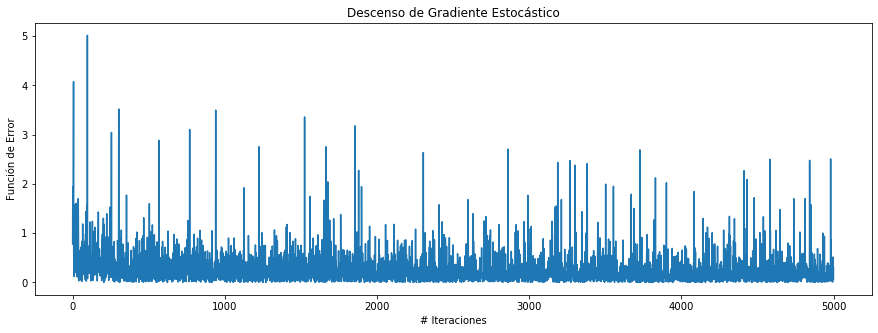

In [70]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

En esta gráfica se observa lo que se espera que ocurra con el algoritmo de descenso de gradiente estocástico y es que la función de error siempre vaya disminuyendo hasta que se cumpla la condición de terminación.